In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("smartphones.csv")

In [3]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [4]:
df.drop(columns=['Free'],inplace=True)

In [5]:
df.shape

(1816, 7)

In [6]:
df.duplicated().sum()

0

<h1>Filling mssing values</h1>

In [7]:
df.describe()

,RAM,Storage,Final Price
count,1333.00000,1791.000000,1816.000000
mean,5.96099,162.652150,492.175573
std,2.66807,139.411605,398.606183
min,1.00000,2.000000,60.460000
25%,4.00000,64.000000,200.990000
50%,6.00000,128.000000,349.990000
75%,8.00000,256.000000,652.717500
max,12.00000,1000.000000,2271.280000


In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(strategy='most_frequent')

In [10]:
encoded_storage = imputer.fit_transform(df[['Storage']])

In [11]:
df['Storage'] = encoded_storage

In [12]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,799.00


In [13]:
encoded_RAM = imputer.fit_transform(df[["RAM"]])
df['RAM'] = encoded_RAM

In [105]:
df.sample(5)

,RAM,Storage,Final Price,Galaxy,Redmi,Oppo,Realme,Xiaomi,iPhone,5G,Blue,Gray,Black,Green,Silver,White,Gold,Purple
119,8.0,128.0,909.00,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
492,8.0,64.0,269.00,0,0,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1207,8.0,128.0,140.00,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1010,8.0,256.0,376.77,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,8.0,256.0,623.00,0,0,0,0,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.isnull().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Final Price    0
dtype: int64

<h1>EDA perform</h1>

<Axes: xlabel='Storage', ylabel='Final Price'>

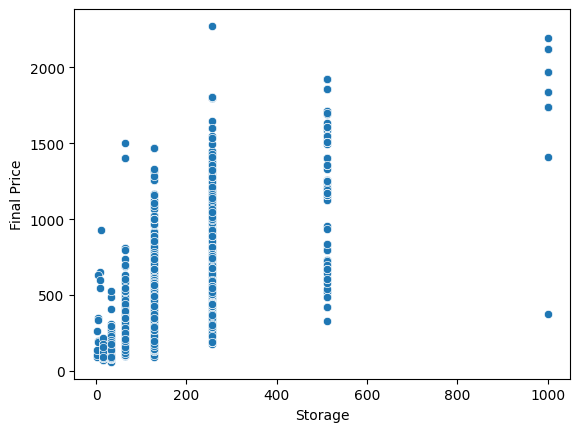

In [16]:
sns.scatterplot(x=df["Storage"],y=df["Final Price"])

<Axes: xlabel='RAM', ylabel='Final Price'>

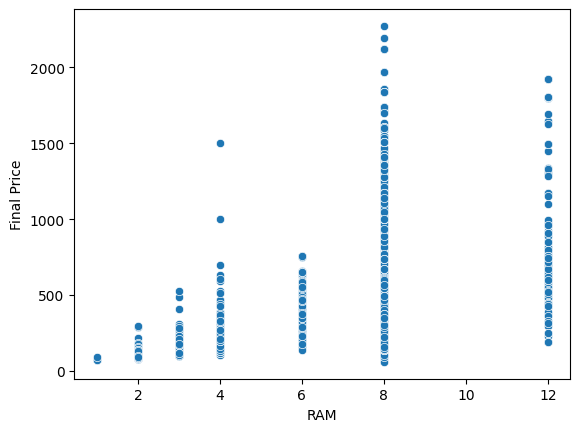

In [17]:
sns.scatterplot(x=df["RAM"],y=df["Final Price"])

<Axes: xlabel='RAM', ylabel='Storage'>

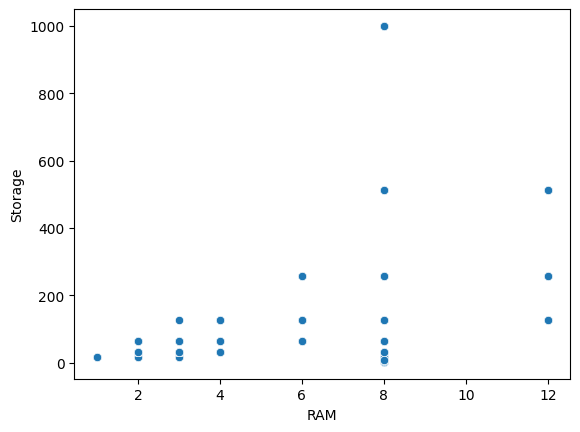

In [18]:
sns.scatterplot(x=df["RAM"],y=df["Storage"])

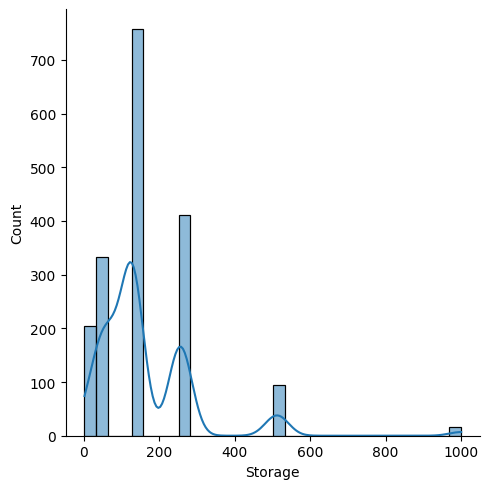

In [19]:
sns.displot(df["Storage"],kde=True,legend=True)

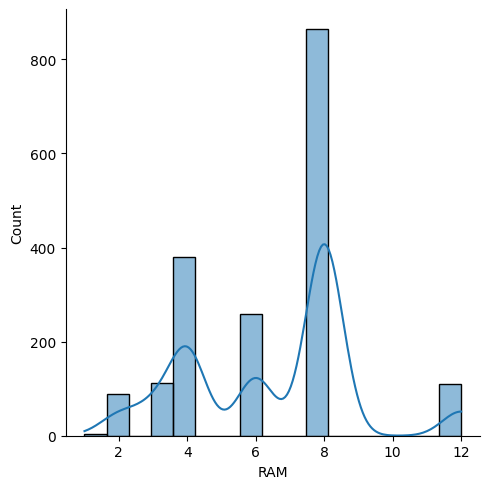

In [20]:
sns.displot(df["RAM"],kde=True,legend=True)

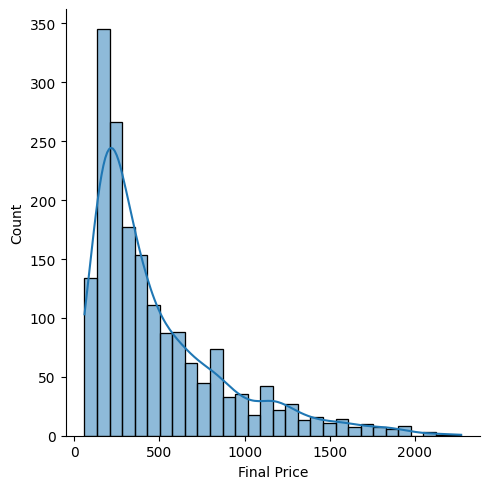

In [21]:
sns.displot(df["Final Price"],kde=True,legend=True)

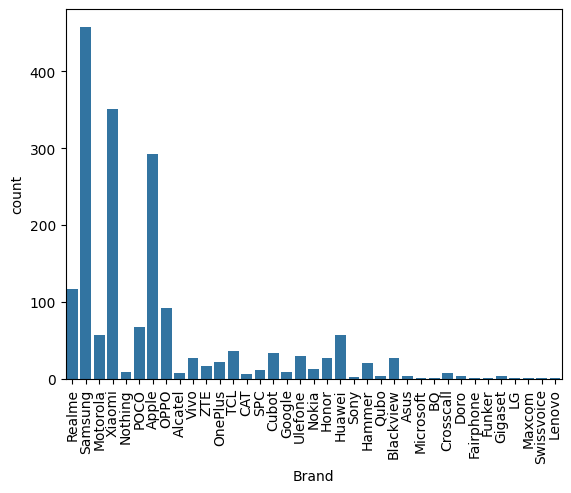

In [22]:
sns.countplot(x="Brand",data=df,legend=True)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
df["Model"].value_counts().sum()

1816

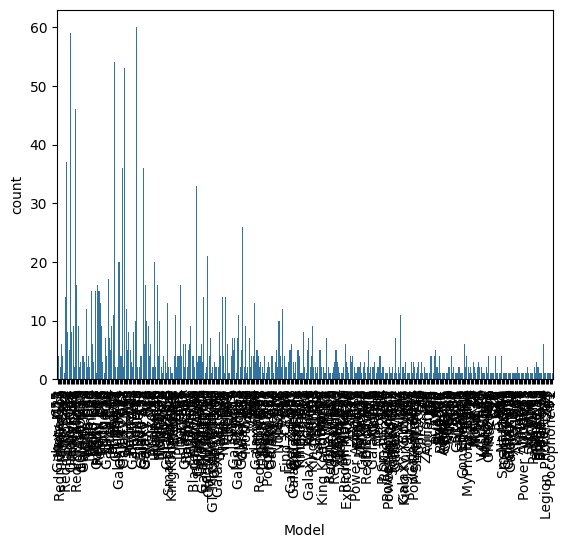

In [24]:
sns.countplot(x="Model",data=df,legend=True)
plt.xticks(rotation='vertical')
plt.show()

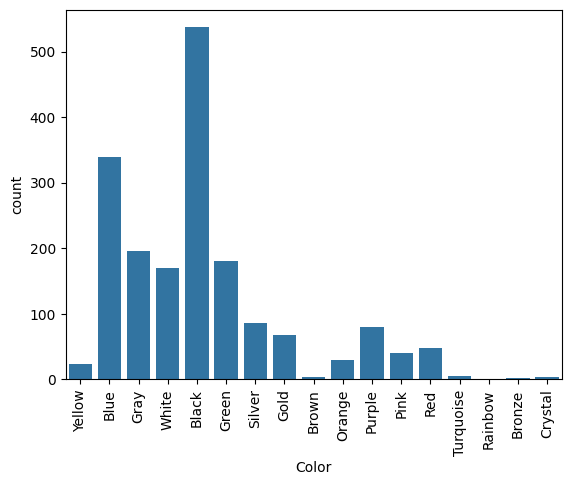

In [25]:
sns.countplot(x="Color",data=df,legend=True)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
df["Galaxy"] = df["Model"].apply(lambda x:1 if "Galaxy" in x else 0)
df["iPhone"] = df["Model"].apply(lambda x:1 if "iPhone" in x else 0)

In [27]:
df['Model'].value_counts()

Model
iPhone 13       60
iPhone 14       59
iPhone 12       54
Galaxy S23      53
11 Pro          46
                ..
Jasper 2         1
A53s             1
G21              1
A57              1
Pocophone F2     1
Name: count, Length: 383, dtype: int64

In [28]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone
171,Vivo Y35 8/256GB Dawn Gold Libre,Vivo,Y35,8.0,256.0,Gold,267.99,0,0
938,Xiaomi Redmi 10A 2/32GB Plata Libre,Xiaomi,Redmi 10A,2.0,32.0,Silver,96.22,0,0
1402,Huawei P30 Pro New Edition 8/256GB Plata Libre,Huawei,P30,8.0,256.0,Silver,999.00,0,0
1190,ZTE Blade A52 Lite 2/32GB Verde Libre,ZTE,Blade A52,2.0,32.0,Green,109.00,0,0
1560,Samsung Galaxy S20 FE 5G 6/128GB Blanco Libre,Samsung,Galaxy S20,6.0,128.0,White,649.00,1,0


<Axes: xlabel='Galaxy'>

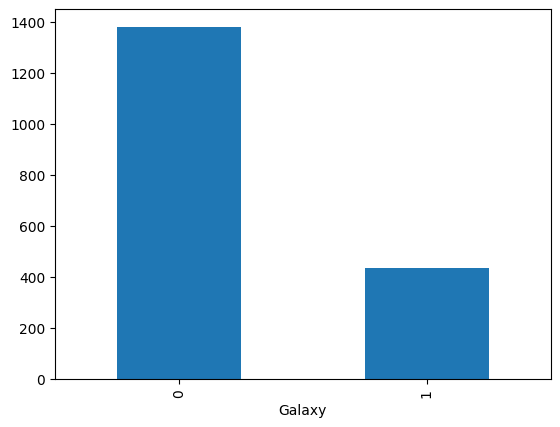

In [29]:
df["Galaxy"].value_counts().plot(kind="bar")

<Axes: xlabel='iPhone', ylabel='Final Price'>

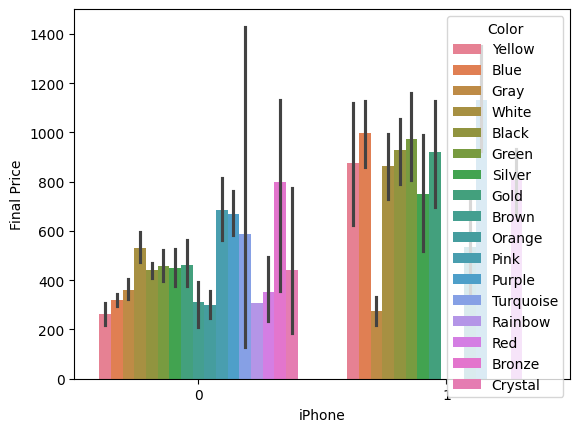

In [30]:
sns.barplot(x=df["iPhone"],y=df["Final Price"],hue=df["Color"])

<Axes: xlabel='Brand'>

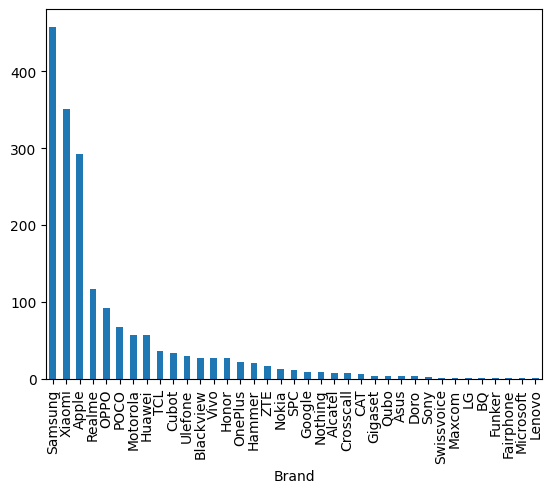

In [31]:
df["Brand"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

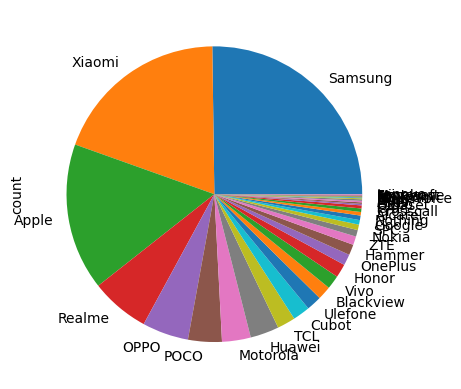

In [32]:
df["Brand"].value_counts().plot(kind="pie")

In [33]:
len(df["Brand"].unique())

37

In [34]:
top_brands = df['Brand'].value_counts().nlargest(6).index.tolist()

In [35]:
top_brands

['Samsung', 'Xiaomi', 'Apple', 'Realme', 'OPPO', 'POCO']

In [36]:
df = df[df['Brand'].isin(top_brands)]

In [37]:
df.isnull().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Final Price    0
Galaxy         0
iPhone         0
dtype: int64

In [38]:
df['Brand'].unique()

array(['Realme', 'Samsung', 'Xiaomi', 'POCO', 'Apple', 'OPPO'],
      dtype=object)

<Axes: xlabel='Brand'>

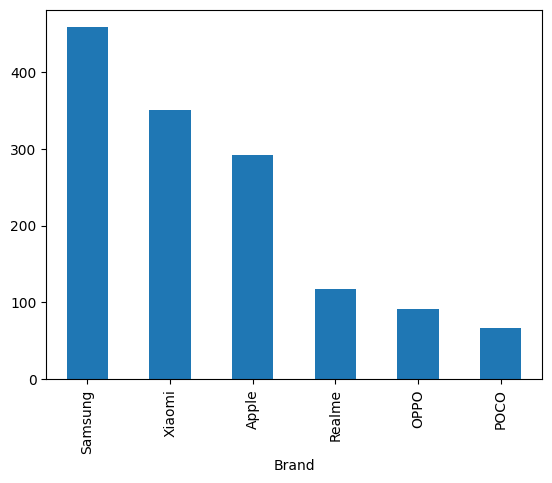

In [39]:
df['Brand'].value_counts().plot(kind="bar")

In [40]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone
465,Samsung Galaxy S21 FE 5G 8/256GB Gris Libre,Samsung,Galaxy S21,8.0,256.0,Gray,649.00,1,0
354,POCO X5 Pro 5G 8/256GB Amarillo Libre,POCO,X5 Pro,8.0,256.0,Yellow,399.99,0,0
69,Xiaomi Redmi Note 12 4/64GB Azul Libre + Cable...,Xiaomi,Redmi Note 12,4.0,64.0,Blue,229.00,0,0
897,Xiaomi Redmi 10 4/64GB Gris Libre,Xiaomi,Redmi 10,4.0,64.0,Gray,229.94,0,0
1660,Xiaomi Mi 9 Lite 6/128GB Azul Boreal Libre,Xiaomi,Mi 9,6.0,128.0,Blue,358.01,0,0


In [41]:
top_colors = df['Color'].value_counts().nlargest(8).index.tolist()
df = df[df["Color"].isin(top_colors)]

In [42]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,279.00,1,0
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,279.99,0,0
7,Realme 9 Pro 5G 8/128GB Negro Libre,Realme,9 Pro,8.0,128.0,Black,352.59,0,0
8,Samsung Galaxy M23 5G 4/128GB Verde Libre,Samsung,Galaxy M23,4.0,128.0,Green,279.00,1,0
9,Xiaomi Redmi Note 12 Pro 8/256GB Gris Grafito ...,Xiaomi,Redmi Note 12,8.0,256.0,Gray,329.99,0,0


In [43]:
df.shape

(1262, 9)

<Axes: xlabel='Color'>

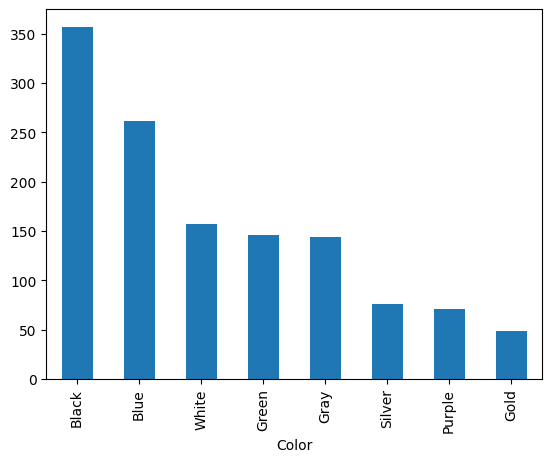

In [44]:
df["Color"].value_counts().plot(kind="bar")

In [45]:
df["Redmi"] = df["Model"].apply(lambda x:1 if "Redmi" in x else 0)

In [46]:
df.sample(10)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone,Redmi
1685,Xiaomi Redmi 9C 4/128GB Azul Libre,Xiaomi,Redmi 9C,4.0,128.0,Blue,179.99,0,0,1
1123,Oppo Reno2 Z 8/128GB Luminous Black Libre,OPPO,Reno2 Z,8.0,128.0,Black,184.00,0,0,0
468,Oppo A54 5G 4/64GB Morado Libre,OPPO,A54,4.0,64.0,Purple,269.00,0,0,0
570,Samsung Galaxy S23 Plus 256GB Lila Libre + Car...,Samsung,Galaxy S23,8.0,256.0,Purple,1209.00,1,0,0
1799,Xiaomi Mi 10T Lite 5G 6/64GB Azul Libre,Xiaomi,Mi 10T,6.0,64.0,Blue,350.00,0,0,0
1691,Xiaomi Redmi Note 10 5G 4/128Gb Gris Libre,Xiaomi,Redmi Note 10,4.0,128.0,Gray,1000.00,0,0,1
1801,Xiaomi Mi Note 10 6/128GB Blanco Libre,Xiaomi,Mi Note 10,6.0,128.0,White,240.00,0,0,0
1588,Samsung Galaxy S8 64GB Negro Libre versión esp...,Samsung,Galaxy S8,8.0,64.0,Black,368.57,1,0,0
88,Apple iPhone 14 Pro 128GB Negro Espacial Libre,Apple,iPhone 14,8.0,128.0,Black,1319.00,0,1,0
136,Apple iPhone 14 Pro 256GB Morado Oscuro Libre,Apple,iPhone 14,8.0,256.0,Purple,1449.00,0,1,0


In [47]:
df["Oppo"] = df[df["Brand"] == "OPPO"]["Model"].apply(lambda x: f'Oppo {x}').apply(lambda x: 1 if 'Oppo' in x else 0)

In [48]:
df["Oppo"].isnull().sum()

1173

In [49]:
df["Oppo"] = df["Oppo"].fillna(0)

In [50]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone,Redmi,Oppo
1266,Samsung Galaxy A52s 5G 6/128GB Violeta Libre,Samsung,Galaxy A52s,6.0,128.0,Purple,339.00,1,0,0,0.0
906,Samsung Galaxy A14 4/128GB Negro Libre Versión...,Samsung,Galaxy A14,4.0,128.0,Black,193.49,1,0,0,0.0
717,Xiaomi Redmi 10 2022 4/128GB Blanco Libre,Xiaomi,Redmi 10,4.0,128.0,White,240.84,0,0,1,0.0
1711,Xiaomi Redmi Note 9 Pro 6/64GB Gris Interestel...,Xiaomi,9 Pro,6.0,64.0,Gray,265.00,0,0,0,0.0
655,Apple iPhone 11 128GB Blanco Libre,Apple,iPhone 11,8.0,128.0,White,429.01,0,1,0,0.0


In [51]:
df["Oppo"] = df["Oppo"].astype(int)

In [52]:
df.isnull().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Final Price    0
Galaxy         0
iPhone         0
Redmi          0
Oppo           0
dtype: int64

In [53]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone,Redmi,Oppo
191,Apple iPhone 12 Pro 256GB Azul Pacífico Libre,Apple,iPhone 12,8.0,256.0,Blue,669.00,0,1,0,0
1068,Apple iPhone 11 Pro Max 512GB Gris Espacial Libre,Apple,11 Pro,8.0,512.0,Gray,607.00,0,0,0,0
1454,Oppo A54s 4/128GB Azul Libre,OPPO,A54s,4.0,128.0,Blue,294.36,0,0,0,1
583,Apple iPhone 13 Pro 128GB Oro Libre,Apple,iPhone 13,8.0,128.0,Gold,1159.00,0,1,0,0
161,Xiaomi Redmi 12 4/128GB Negro Medianoche Libre,Xiaomi,Redmi 12,4.0,128.0,Black,144.95,0,0,1,0


In [54]:
df["Realme"] = df[df["Brand"] == "Realme"]["Model"].apply(lambda x: f'Realme {x}').apply(lambda x: 1 if 'Realme' in x else 0)
df["Realme"] = df["Realme"].fillna(0)
df["Realme"] = df["Realme"].astype(int)

In [55]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone,Redmi,Oppo,Realme
1098,Apple iPhone XR 64GB Negro Libre,Apple,iPhone XR,8.0,64.0,Black,465.00,0,1,0,0,0
1557,Samsung Galaxy S20 12/128GB 5G Cloud Blue Libre,Samsung,Galaxy S20,12.0,128.0,Blue,719.12,1,0,0,0,0
717,Xiaomi Redmi 10 2022 4/128GB Blanco Libre,Xiaomi,Redmi 10,4.0,128.0,White,240.84,0,0,1,0,0
952,Xiaomi Redmi Note 9 4/128GB Verde Libre,Xiaomi,Redmi Note 9,4.0,128.0,Green,269.00,0,0,1,0,0
1554,Samsung Galaxy Note 9 128GB Negro Libre versió...,Samsung,Note 9,8.0,128.0,Black,522.28,0,0,0,0,0


In [56]:
df["Xiaomi"] = df[df["Brand"] == "Xiaomi"]["Model"].apply(lambda x: f'Xiaomi {x}').apply(lambda x: 1 if 'Xiaomi' in x else 0)
df["Xiaomi"] = df["Xiaomi"].fillna(0)
df["Xiaomi"] = df["Xiaomi"].astype(int)

In [57]:
df[df["Brand"] == "Apple"]["Model"].sample(20)

745     iPhone 12
770     iPhone 12
167     iPhone 14
538     iPhone 14
1039    iPhone 13
174     iPhone 14
277     iPhone XS
1176    iPhone 12
116     iPhone 14
993     iPhone 12
1122       11 Pro
1031    iPhone 12
421        11 Pro
485     iPhone 14
1738    iPhone 6s
789     iPhone 14
389     iPhone 12
309     iPhone XR
757     iPhone 13
804     iPhone 13
Name: Model, dtype: object

In [58]:
df["iPhone"] = df[df["Brand"] == "iPhone"]["Model"].apply(lambda x: f'iPhone {x}').apply(lambda x: 1 if 'iPhone' in x else 0)
df["iPhone"] = df["iPhone"].fillna(0)
df["iPhone"] = df["iPhone"].astype(int)

/var/folders/25/n218mgyj6x1gybvn2ytyr2xc0000gp/T/ipykernel_3306/1822867903.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["iPhone"] = df["iPhone"].fillna(0)


In [59]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone,Redmi,Oppo,Realme,Xiaomi
485,Apple iPhone 14 Pro Max 512GB Morado Oscuro Libre,Apple,iPhone 14,8.0,512.0,Purple,1859.00,0,0,0,0,0,0
1721,realme 7 8/128GB Blanco Libre,Realme,7,8.0,128.0,White,195.00,0,0,0,0,1,0
258,Xiaomi Redmi 9C NFC 3/64GB Gris Libre,Xiaomi,Redmi 9C,3.0,64.0,Gray,101.14,0,0,1,0,0,1
465,Samsung Galaxy S21 FE 5G 8/256GB Gris Libre,Samsung,Galaxy S21,8.0,256.0,Gray,649.00,1,0,0,0,0,0
1292,Samsung Galaxy S20 Plus 12/128GB 5G Cloud Whit...,Samsung,Galaxy S20,12.0,128.0,White,319.00,1,0,0,0,0,0


In [60]:
df.drop(columns=['iPhone'],inplace=True)

In [61]:
df["iPhone"] = df[df["Brand"] == "Apple"]["Model"].apply(lambda x: f'iPhone {x}').apply(lambda x: 1 if 'iPhone' in x else 0)
df["iPhone"] = df["iPhone"].fillna(0)
df["iPhone"] = df["iPhone"].astype(int)

In [62]:
df['Galaxy_Series'] = df[df["Brand"] == "Samsung"]["Model"].apply(lambda x: f'Galaxy {x}' if 'Galaxy' not in x else x)

In [63]:
df["5G"] = df["Smartphone"].apply(lambda x: 1 if '5G' in x else 0)
df["5G"].fillna(0)

1       1
3       0
7       1
8       1
9       0
       ..
1811    0
1812    0
1813    0
1814    0
1815    0
Name: 5G, Length: 1262, dtype: int64

In [64]:
df.sample(5)
df["5G"].value_counts()

5G
0    843
1    419
Name: count, dtype: int64

In [65]:
df["Storage"].astype('int')
df["RAM"].astype('int')
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,Redmi,Oppo,Realme,Xiaomi,iPhone,Galaxy_Series,5G
1731,Apple iPhone 13 Pro 512GB Azul Sierra Libre,Apple,iPhone 13,8.0,512.0,Blue,1509.00,0,0,0,0,0,1,NaN,0
469,Samsung Galaxy Note 10 Plus 256GB Aura Glow Libre,Samsung,Galaxy Note 10,8.0,256.0,Purple,810.78,1,0,0,0,0,0,Galaxy Note 10,0
698,Black Shark 5 Pro 12/256GB 5G Negro Libre,Xiaomi,Shark 5,12.0,256.0,Black,779.00,0,0,0,0,1,0,NaN,1
598,Apple iPhone XS Max 256Gb Gris Espacial Libre,Apple,iPhone XS,8.0,256.0,Gray,388.00,0,0,0,0,0,1,NaN,0
962,Xiaomi PocoPhone X3 Pro 6/128GB Negro Fantasma...,Xiaomi,X3,6.0,128.0,Black,364.63,0,0,0,0,1,0,NaN,0


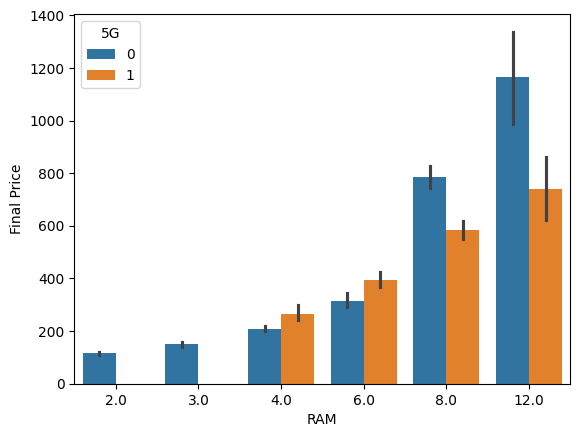

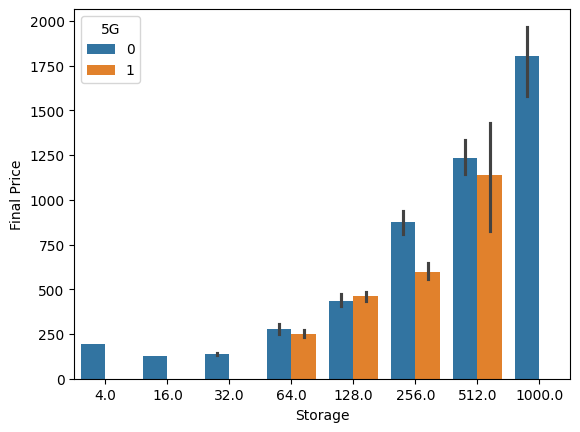

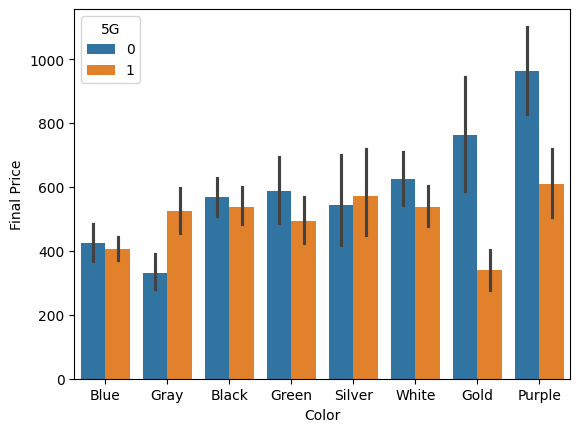

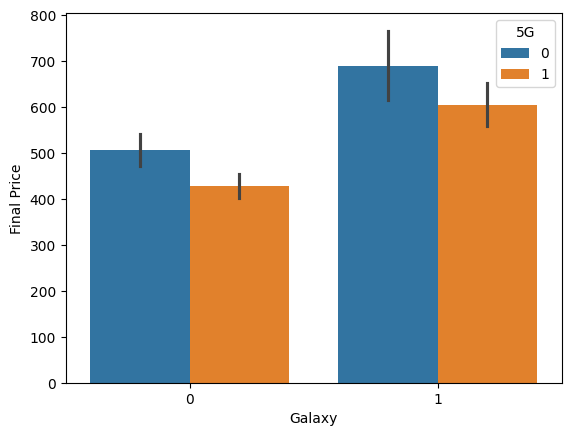

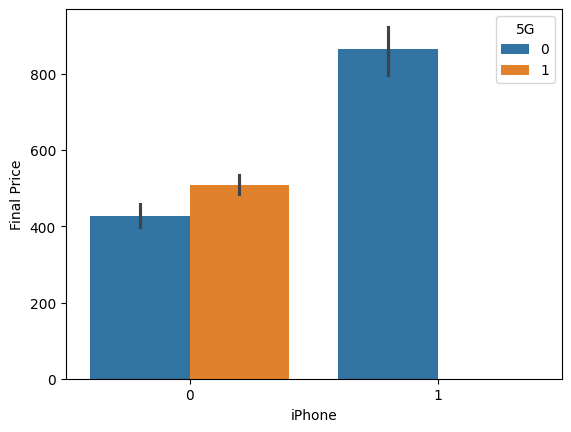

In [66]:
rel = ['RAM','Storage','Color','Galaxy','iPhone']
for i in rel:
    sns.barplot(x=df[i],y=df["Final Price"],hue=df["5G"])
    plt.show()


In [67]:
df["Galaxy_Series"] = df["Model"].apply(lambda x: x.split(' ')[1] if 'Galaxy S' in x else 'No')

In [68]:
df["Galaxy_Series"].value_counts()

Galaxy_Series
No     1106
S23      53
S21      34
S22      28
S20      27
S10       7
S8        5
S9        2
Name: count, dtype: int64

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,Redmi,Oppo,Realme,Xiaomi,iPhone,Galaxy_Series,5G
714,Xiaomi Redmi 9C 4/128GB Gris Medianoche Libre,Xiaomi,Redmi 9C,4.0,128.0,Gray,196.26,0,1,0,0,1,0,No,0
179,Samsung Galaxy A54 5G 8/256GB Negro Libre + Pr...,Samsung,Galaxy A54,8.0,256.0,Black,549.00,1,0,0,0,0,0,No,1
1244,Apple iPhone 11 Pro Max 512GB Plata Libre,Apple,11 Pro,8.0,512.0,Silver,645.99,0,0,0,0,0,1,No,0
848,Samsung Galaxy A23 5G 4/128GB Blanco Libre Ver...,Samsung,Galaxy A23,4.0,128.0,White,249.01,1,0,0,0,0,0,No,1
291,Apple iPhone 13 Pro 128GB Azul Sierra Libre,Apple,iPhone 13,8.0,128.0,Blue,1159.00,0,0,0,0,0,1,No,0


In [71]:
df["Color"].unique()

array(['Blue', 'Gray', 'Black', 'Green', 'Silver', 'White', 'Gold',
       'Purple'], dtype=object)

In [72]:
ohe = OneHotEncoder()
encoded_color = ohe.fit_transform(df[["Color"]])
encoded_color_dataframe = pd.DataFrame(encoded_color.toarray(),columns=df["Color"].unique())

In [73]:
df.reset_index(drop=True, inplace=True)
encoded_color_dataframe.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_color_dataframe], axis=1)
df.shape

(1262, 23)

In [74]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,Redmi,Oppo,...,Galaxy_Series,5G,Blue,Gray,Black,Green,Silver,White,Gold,Purple
163,POCO X5 5G 8/256GB Negro Libre,POCO,X5,8.0,256.0,Black,349.99,0,0,0,...,No,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
927,OPPO A16s 4/64GB Azul Libre,OPPO,A16s,4.0,64.0,Blue,189.00,0,0,1,...,No,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
233,Xiaomi Redmi Note 12 Pro 5G 6/128GB Blanco Libre,Xiaomi,Redmi Note 12,6.0,128.0,White,379.99,0,1,0,...,No,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
476,Apple iPhone 13 512GB Verde Alpino Libre,Apple,iPhone 13,8.0,512.0,Green,1259.00,0,0,0,...,No,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1140,Xiaomi Mi 9 Lite 6/128GB Azul Boreal Libre,Xiaomi,Mi 9,6.0,128.0,Blue,358.01,0,0,0,...,No,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
df.drop(columns=["Smartphone","Brand","Model","Color","Galaxy_Series"],inplace=True)

In [106]:
df.sample(5)

,RAM,Storage,Final Price,Galaxy,Redmi,Oppo,Realme,Xiaomi,iPhone,5G,Blue,Gray,Black,Green,Silver,White,Gold,Purple
161,8.0,256.0,699.0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
637,4.0,64.0,210.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
968,6.0,128.0,349.0,0,0,0,0,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1035,4.0,128.0,209.0,0,0,0,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
348,8.0,256.0,1209.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [108]:
df["Final Price"] = df["Final Price"].apply(lambda x: x * 45)

In [77]:
df.isnull().sum()

RAM            0
Storage        0
Final Price    0
Galaxy         0
Redmi          0
Oppo           0
Realme         0
Xiaomi         0
iPhone         0
5G             0
Blue           0
Gray           0
Black          0
Green          0
Silver         0
White          0
Gold           0
Purple         0
dtype: int64

In [78]:
df.shape

(1262, 18)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RAM          1262 non-null   float64
 1   Storage      1262 non-null   float64
 2   Final Price  1262 non-null   float64
 3   Galaxy       1262 non-null   int64  
 4   Redmi        1262 non-null   int64  
 5   Oppo         1262 non-null   int64  
 6   Realme       1262 non-null   int64  
 7   Xiaomi       1262 non-null   int64  
 8   iPhone       1262 non-null   int64  
 9   5G           1262 non-null   int64  
 10  Blue         1262 non-null   float64
 11  Gray         1262 non-null   float64
 12  Black        1262 non-null   float64
 13  Green        1262 non-null   float64
 14  Silver       1262 non-null   float64
 15  White        1262 non-null   float64
 16  Gold         1262 non-null   float64
 17  Purple       1262 non-null   float64
dtypes: float64(11), int64(7)
memory usage: 177.6 KB


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [81]:
y = df["Final Price"]
x = df.drop(columns=["Final Price"])

X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.09, random_state=40)

In [82]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [83]:
# pca = PCA(n_components=14)

# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.fit_transform(X_test_scaled)

model = SGDRegressor()
model.fit(X_train_scaled,Y_train)

SGDRegressor()

In [84]:
y_pred = model.predict(X_test_scaled)

In [85]:
r2_score(Y_test,y_pred)

0.7459776909200273

In [86]:
Y_test.shape

(114,)

In [87]:
y_pred

array([ 7.90557291e+01,  8.08955545e+02,  7.36582765e+02,  1.74370207e+03,
        6.43385105e+02,  7.73662560e+01,  8.37655432e+02,  5.55883764e+02,
        2.15528731e+02,  4.61522756e+02,  2.06538926e+02,  3.16333583e+02,
        9.38558553e+02,  7.33657104e+02,  9.10028211e+02,  6.18778378e+02,
        2.20782448e+02,  4.55317004e+02,  2.93801225e+02, -1.97076168e+01,
        8.15653628e+02,  1.70408550e+03,  1.14590645e+03,  4.86980984e+02,
        9.00321345e+02,  8.15653628e+02,  1.13628271e+03,  2.20782448e+02,
        1.14592003e+03,  4.10365286e+02,  3.32173985e+02,  4.07612961e+02,
        7.02046990e+02,  4.61522756e+02,  1.98250089e+02,  3.34687074e+02,
        7.64590927e+02,  5.49624093e+02,  1.28149592e+02,  5.58346385e+02,
        3.16160247e+02,  5.86870606e+02,  4.97695740e+02,  8.53121314e+00,
        4.00606775e+02,  1.57125839e+02,  7.44901798e+02,  2.54042359e+02,
        1.70408550e+03,  2.05891411e+02,  1.13920837e+03,  2.54864496e+02,
        8.06029883e+02,  

In [88]:
X_test_scaled.shape

(114, 17)

In [89]:
Y_test

1026     168.44
340      959.00
1095     681.00
1200    1839.00
726      457.00
         ...   
485      589.00
86       389.95
821      559.00
215      954.00
538      199.99
Name: Final Price, Length: 114, dtype: float64

In [90]:
X_test_scaled[1]

array([0.6       , 0.23140496, 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        ])

In [91]:
d = [0.6, 0.23140496, 1., 0., 0. ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 1.]
d

[0.6,
 0.23140496,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [92]:
p = np.array([0.6, 0.23140496, 1., 0., 0. ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 1.])

In [93]:
model.predict(p.reshape(1, -1))

array([808.95554638])

In [94]:
x.sample(4)

,RAM,Storage,Galaxy,Redmi,Oppo,Realme,Xiaomi,iPhone,5G,Blue,Gray,Black,Green,Silver,White,Gold,Purple
738,4.0,128.0,0,0,0,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
279,8.0,256.0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
77,12.0,256.0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1100,12.0,512.0,1,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
p.reshape(1, -1)

array([[0.6       , 0.23140496, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]])

In [96]:
s = pd.DataFrame(X_test_scaled,columns=x.columns)

In [97]:
y_pred.shape

(114,)

In [98]:
Y_test.shape

(114,)

In [99]:
predicted = pd.DataFrame(y_pred,columns=["Predicted"])

In [100]:
predicted.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

predicted["Actual"] = Y_test

In [101]:
predicted.shape

(114, 2)

In [104]:
y.sample(5)

1160     93.90
754     120.00
425     201.47
852     340.42
799     299.99
Name: Final Price, dtype: float64